This is a basic Regression based solution to the problem.

In [1]:
%matplotlib inline
import numpy as np # logistic regression
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import graphviz  #表示する時に使う
import pydotplus #dot形式を使うときのライブラリ(graphvizとセット)
from IPython.display import Image #グラフを画像として扱うので使う
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


plt.style.use('ggplot') 

df = pd.read_csv('1_data/mushrooms.csv')
print(df.columns)
display(df.head())
display(df.tail())
#df['date'] = pd.to_datetime(df['date'])
#df['date'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
#print(df.head())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


まずはクラスの数を確認する

In [2]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\Users\ytamura\AppData\Local\conda\conda\envs\skillupAI\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


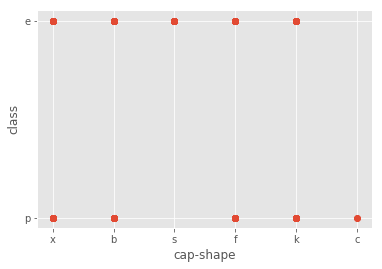

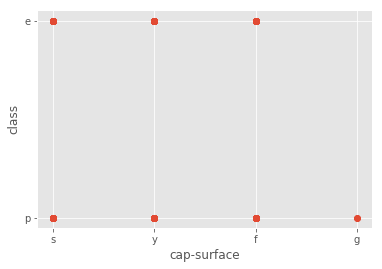

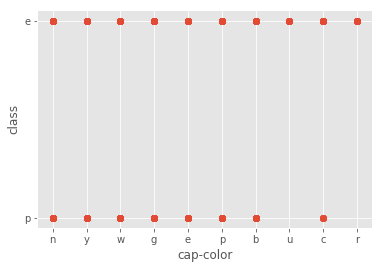

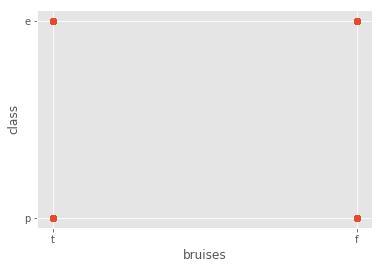

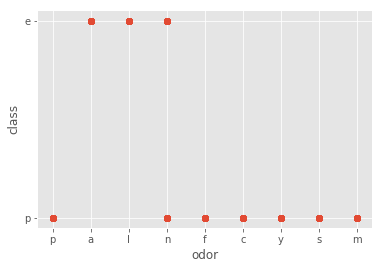

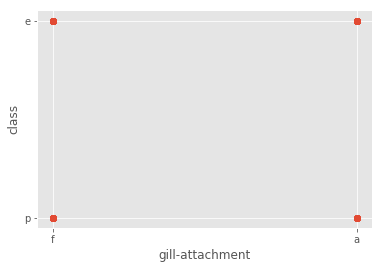

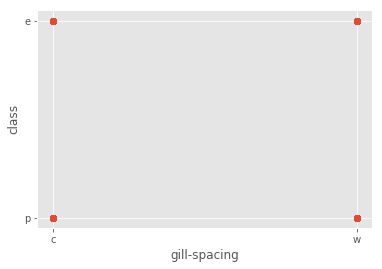

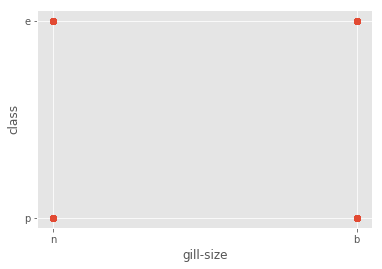

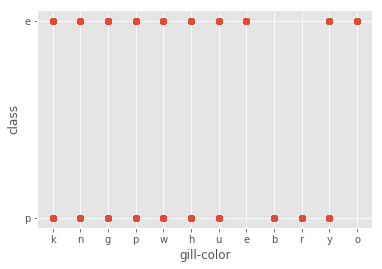

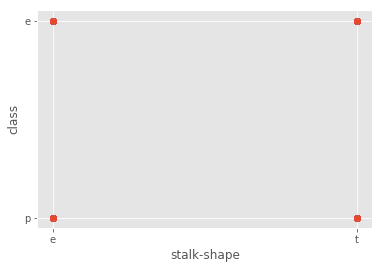

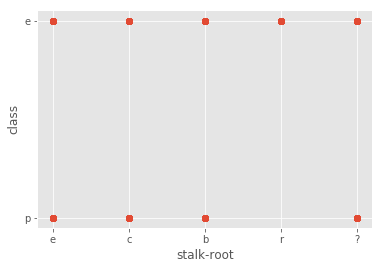

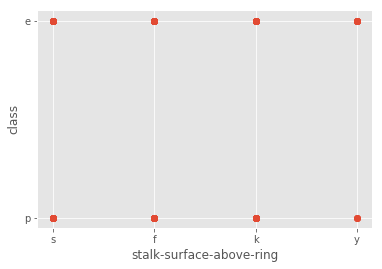

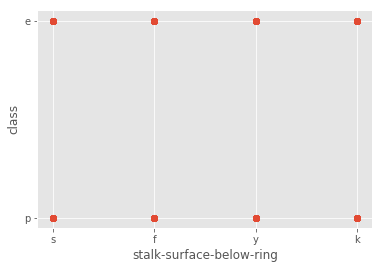

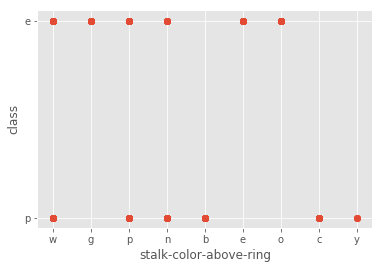

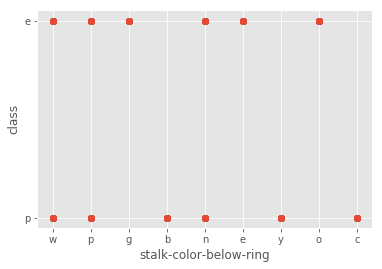

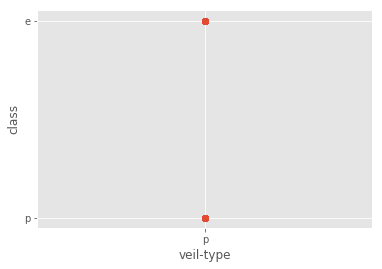

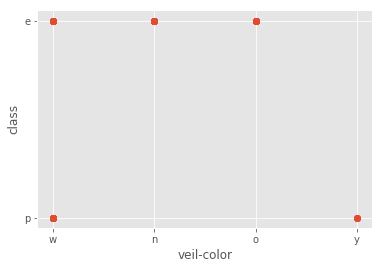

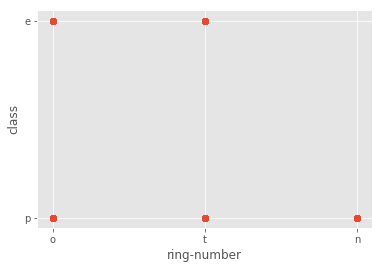

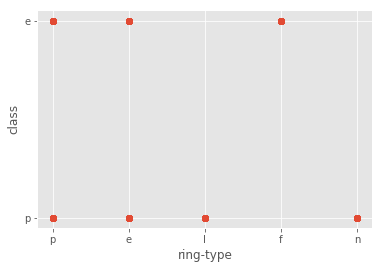

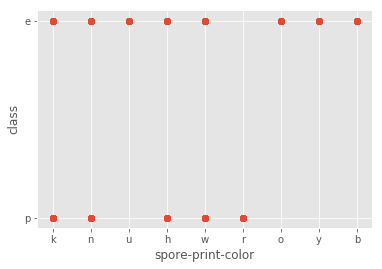

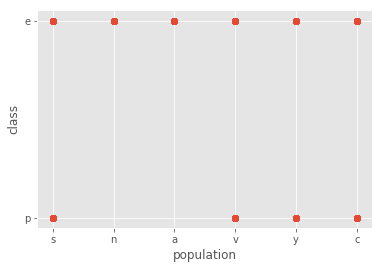

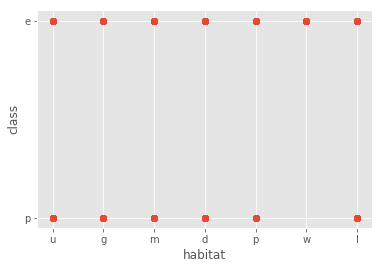

In [3]:
#この可視化以外にも授業で習ったことをやってください

#labels = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
labels = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
y = 'class'
for i in range(len(labels)):
    plt.figure()
    plt.scatter(df[labels[i]], df[y])
    plt.xlabel(labels[i])
    plt.ylabel(y)

In [4]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [ ]:
df.plot.bar(y=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], alpha=0.6, figsize=(12,3))#棒グラフの作成
#plt.show()#グラフをここで描画させるための行

In [5]:
#棒グラフ表示用に加工したデータセットを作る(失敗例)
df_cross = pd.crosstab(df[y], [df['cap-shape'], df['cap-surface'], df['cap-color'], df['bruises'], df['odor'],
       df['gill-attachment'], df['gill-spacing'], df['gill-size'], df['gill-color'],
       df['stalk-shape'], df['stalk-root'], df['stalk-surface-above-ring'],
       df['stalk-surface-below-ring'], df['stalk-color-above-ring'],
       df['stalk-color-below-ring'], df['veil-type'], df['veil-color'], df['ring-number'],
       df['ring-type'], df['spore-print-color'], df['population'], df['habitat']])
print(df_cross)


cap-shape                 b                            ...  x                 \
cap-surface               f                            ...  y                  
cap-color                 g                            ...  y                  
bruises                   f                            ...  t                  
odor                      n                            ...  l                  
gill-attachment           f                            ...  f                  
gill-spacing              w                            ...  c                  
gill-size                 b                            ...  b                  
gill-color                g                       p    ...  w                  
stalk-shape               e                       e    ...  e                  
stalk-root                ?                       ?    ...  c     r            
stalk-surface-above-ring  k           s           k    ...  s     s            
stalk-surface-below-ring  k     s     k 

cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708


C:\Users\ytamura\AppData\Local\conda\conda\envs\skillupAI\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'cap-shape')

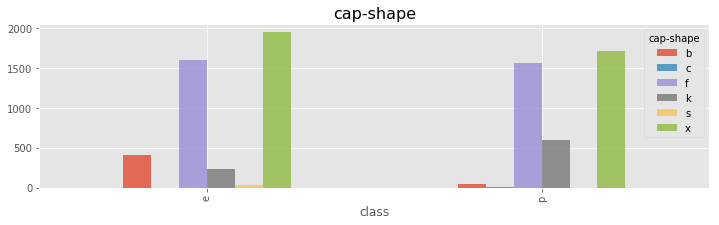

In [6]:
#棒グラフ表示用に加工したデータセットを作る(一つでテスト)
df_cross = pd.crosstab(df[y], df['cap-shape'])
print(df_cross)

df_cross.plot.bar(y=df_cross.columns, alpha=0.8, figsize=(12,3))
plt.title('cap-shape', size=16)

class     e     p
class            
e      4208     0
p         0  3916
cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708
cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740
cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  320  672


C:\Users\ytamura\AppData\Local\conda\conda\envs\skillupAI\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


bruises     f     t
class              
e        1456  2752
p        3292   624
odor     a    c     f    l   m     n    p    s    y
class                                              
e      400    0     0  400   0  3408    0    0    0
p        0  192  2160    0  36   120  256  576  576
gill-attachment    a     f
class                     
e                192  4016
p                 18  3898
gill-spacing     c     w
class                   
e             3008  1200
p             3804   112
gill-size     b     n
class                
e          3920   288
p          1692  2224
gill-color     b   e    g    h    k    n   o    p   r    u    w   y
class                                                              
e              0  96  248  204  344  936  64  852   0  444  956  64
p           1728   0  504  528   64  112   0  640  24   48  246  22
stalk-shape     e     t
class                  
e            1616  2592
p            1900  2016
stalk-root     ?     b    c    e    r
class     

C:\Users\ytamura\AppData\Local\conda\conda\envs\skillupAI\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


population    a    c    n    s     v     y
class                                     
e           384  288  400  880  1192  1064
p             0   52    0  368  2848   648
habitat     d     g    l    m     p    u    w
class                                        
e        1880  1408  240  256   136   96  192
p        1268   740  592   36  1008  272    0


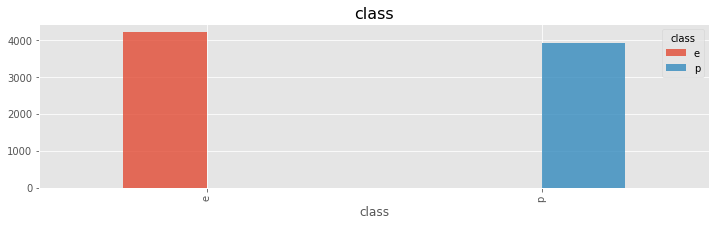

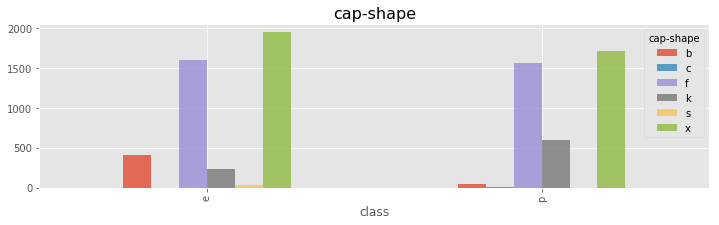

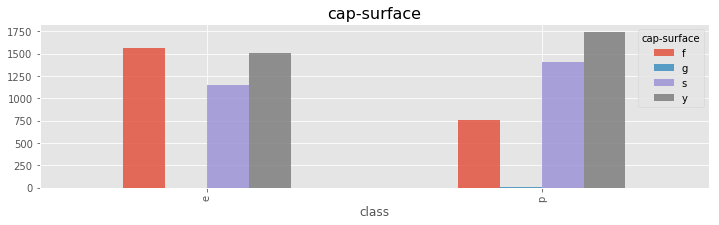

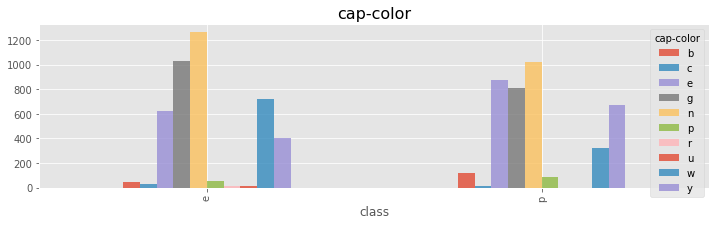

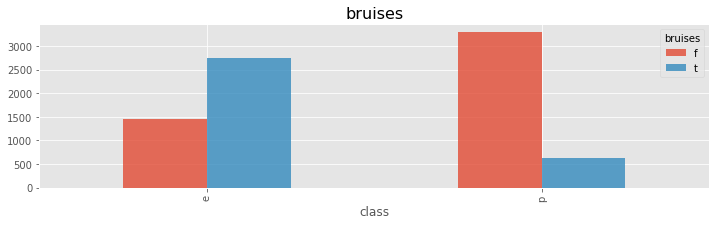

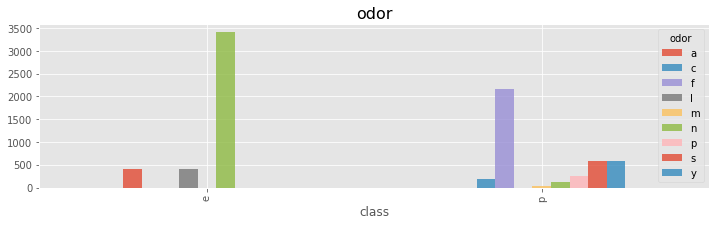

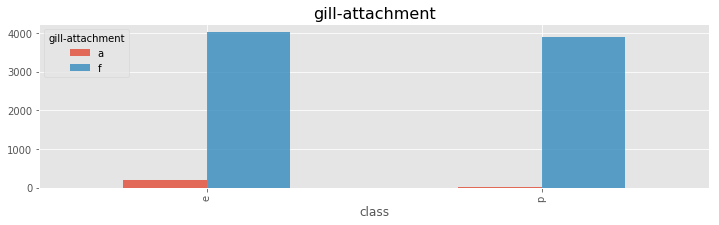

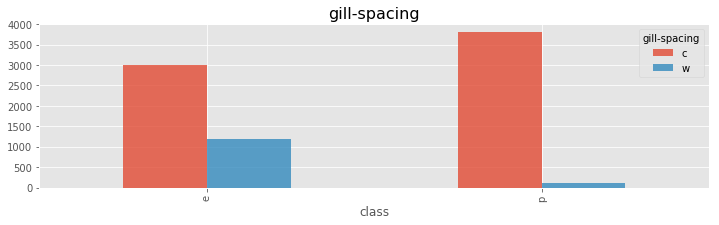

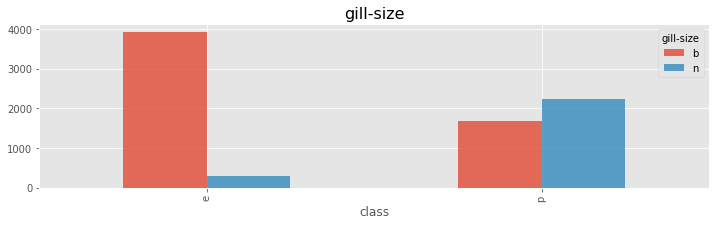

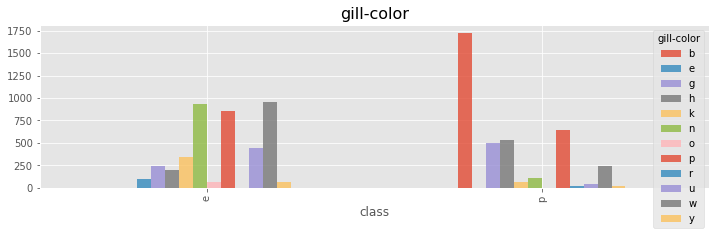

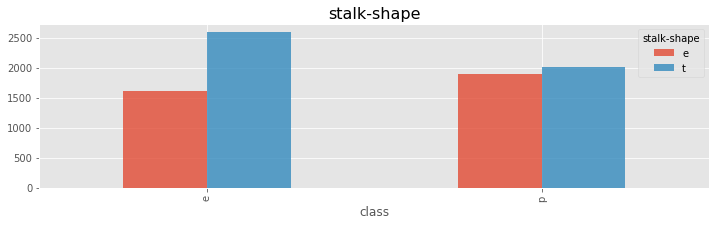

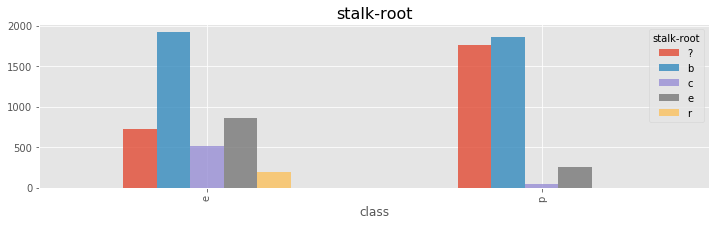

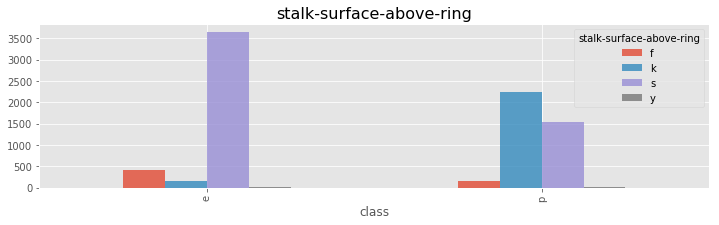

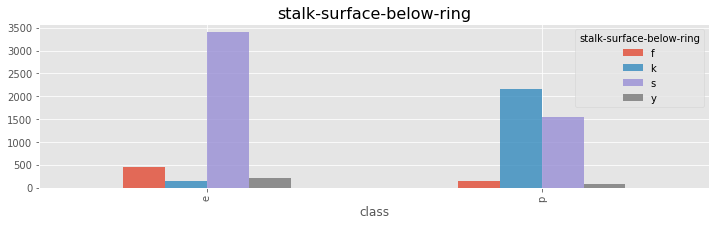

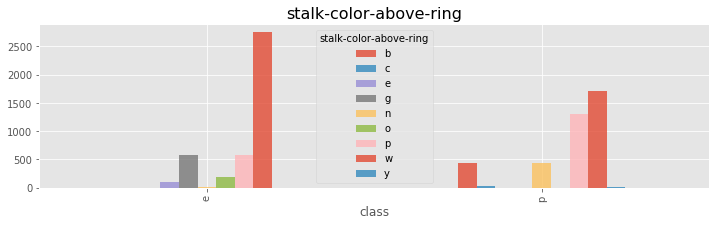

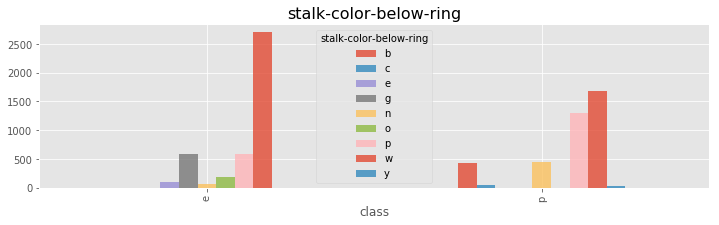

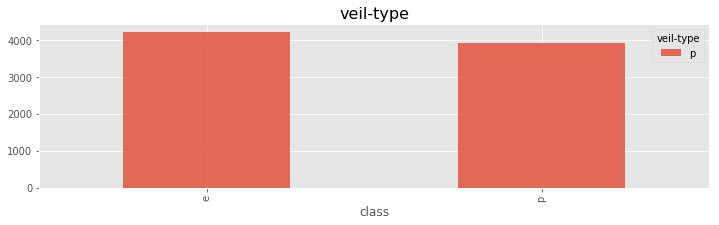

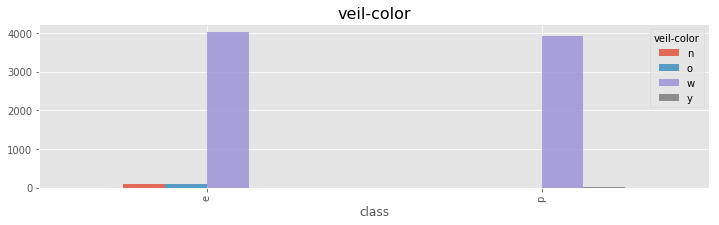

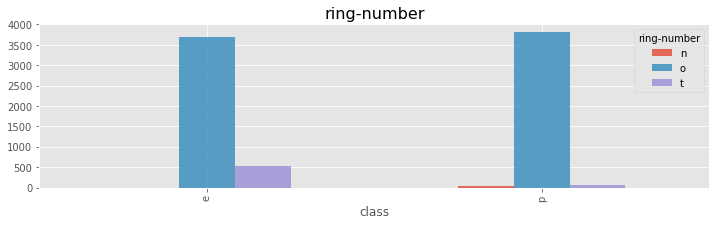

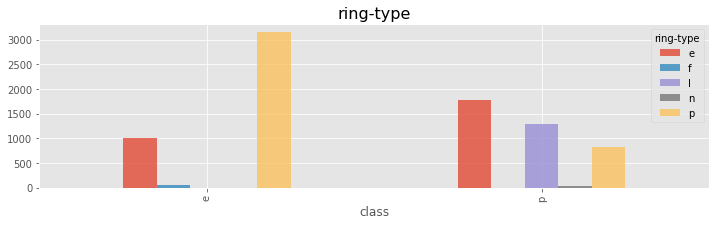

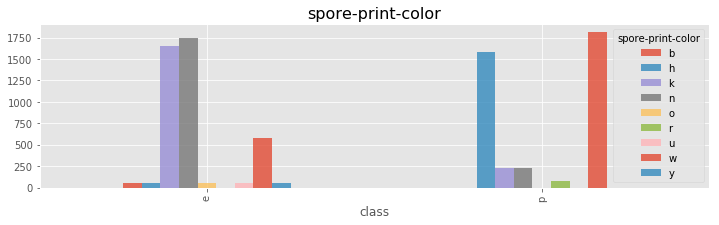

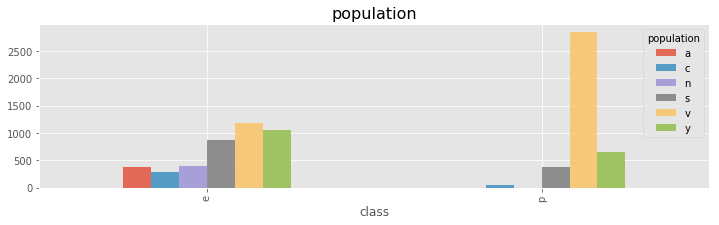

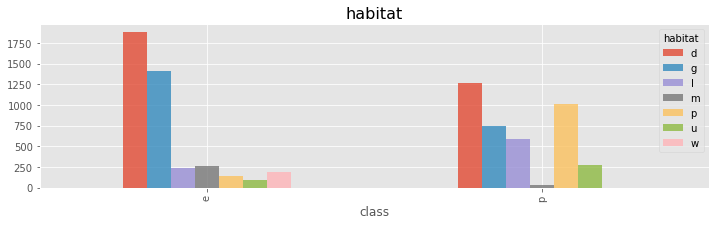

In [7]:
#上手くいったのでFor文化
for key, column in df.iteritems():
    df_cross = pd.crosstab(df[y], df[key])
    print(df_cross)

    df_cross.plot.bar(y=df_cross.columns, alpha=0.8, figsize=(12,3))
    plt.title(key, size=16)

ラベルを数値データに変換する。  
(やり方はネットのコピペです)

In [8]:
df_int = pd.DataFrame()
le = LabelEncoder()
for col in df.columns:
    df_int[col] = le.fit_transform( df[col])
df_int.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
# トレインテスト分割を授業で習った方法でやってください。
train = df_int[:6500]
test = df_int[6500:-1]
y = train['class']
#y = np.where(tmp_y == "p", 0, 1)
y_test = test['class']
#y_test = np.where(tmp_y_test == "p", 0, 1)
train = train.drop('class', 1)
test = test.drop('class', 1)

In [10]:
#ロジスティック回帰で分類し、妥当性を評価する
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(train, y)
y_pred = lr.predict(test)

print(lr.coef_,lr.intercept_)
y_pred = lr.predict(test)

print(classification_report(y_test,y_pred))

[[ 0.02571416  0.45170675 -0.01026994 -0.42895294 -0.48820357  1.51710302
  -7.8289162   9.01409425 -0.20511101  0.36383431 -2.65074253 -6.53089872
  -0.45387205 -0.07830302  0.01984504  0.          3.02039824  4.14653697
   1.75142784 -0.43447784 -0.47615896  0.11348703]] [1.49128302]
             precision    recall  f1-score   support

          0       0.90      0.75      0.81       506
          1       0.89      0.96      0.93      1117

avg / total       0.89      0.89      0.89      1623



Class:1=p,0=e

In [11]:
#10交差検証実施の前にまずはランダムフォレストやってみる
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

# トレインテスト分割(Day1ホームワークとやり方同じ)。※データセットも元のまま
train_rf = df_int[:6500]
test_rf = df_int[6500:-1]

y_train_rf = train_rf['class']
#y = np.where(tmp_y == "p", 0, 1)
y_test_rf = test_rf['class']
#y_test = np.where(tmp_y_test == "p", 0, 1)
train_rf = train_rf.drop('class', 1)
test_rf = test_rf.drop('class', 1)

clf = RandomForestClassifier(n_estimators=10, max_depth=10, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234) #n_estimators = バギングする決定木の数
clf.fit(train_rf, y_train_rf)
print("score=", clf.score(test_rf, y_test_rf))



score= 0.973505853357979


[0.00471598 0.01022574 0.0291908  0.05617002 0.15755295 0.00037054
 0.02120937 0.10649491 0.07448835 0.01566832 0.08057695 0.00641587
 0.10557571 0.00844677 0.0308072  0.         0.         0.01290084
 0.05978788 0.15509541 0.0343745  0.02993189]


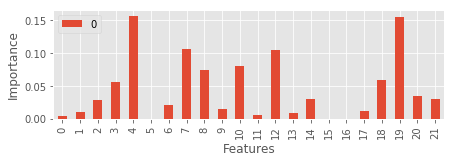

In [12]:
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

ダミー変数化していないが精度高め。  
10交差検証でもう一度確認

In [13]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

#param_grid = {'n_estimators':[10,15,20],'max_depth':[3,5,7],}#試したいハイパーパラメータとそのリストを用意しておく
#上手くいかなかったので、一つのパラメータでやる
param_grid = {'max_depth':[3,5,7,10,15,20],}
cv = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5)
cv.fit(train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
cv.best_params_

{'max_depth': 10}

In [15]:
print(classification_report(y_test_rf,cv.best_estimator_.predict(test_rf)))

             precision    recall  f1-score   support

          0       0.98      0.89      0.93       506
          1       0.95      0.99      0.97      1117

avg / total       0.96      0.96      0.96      1623



In [17]:
#Class:1=p,0=e
print(confusion_matrix(y_test_rf,cv.best_estimator_.predict(test_rf)))

[[ 450   56]
 [   8 1109]]


Class:1=p,0=e

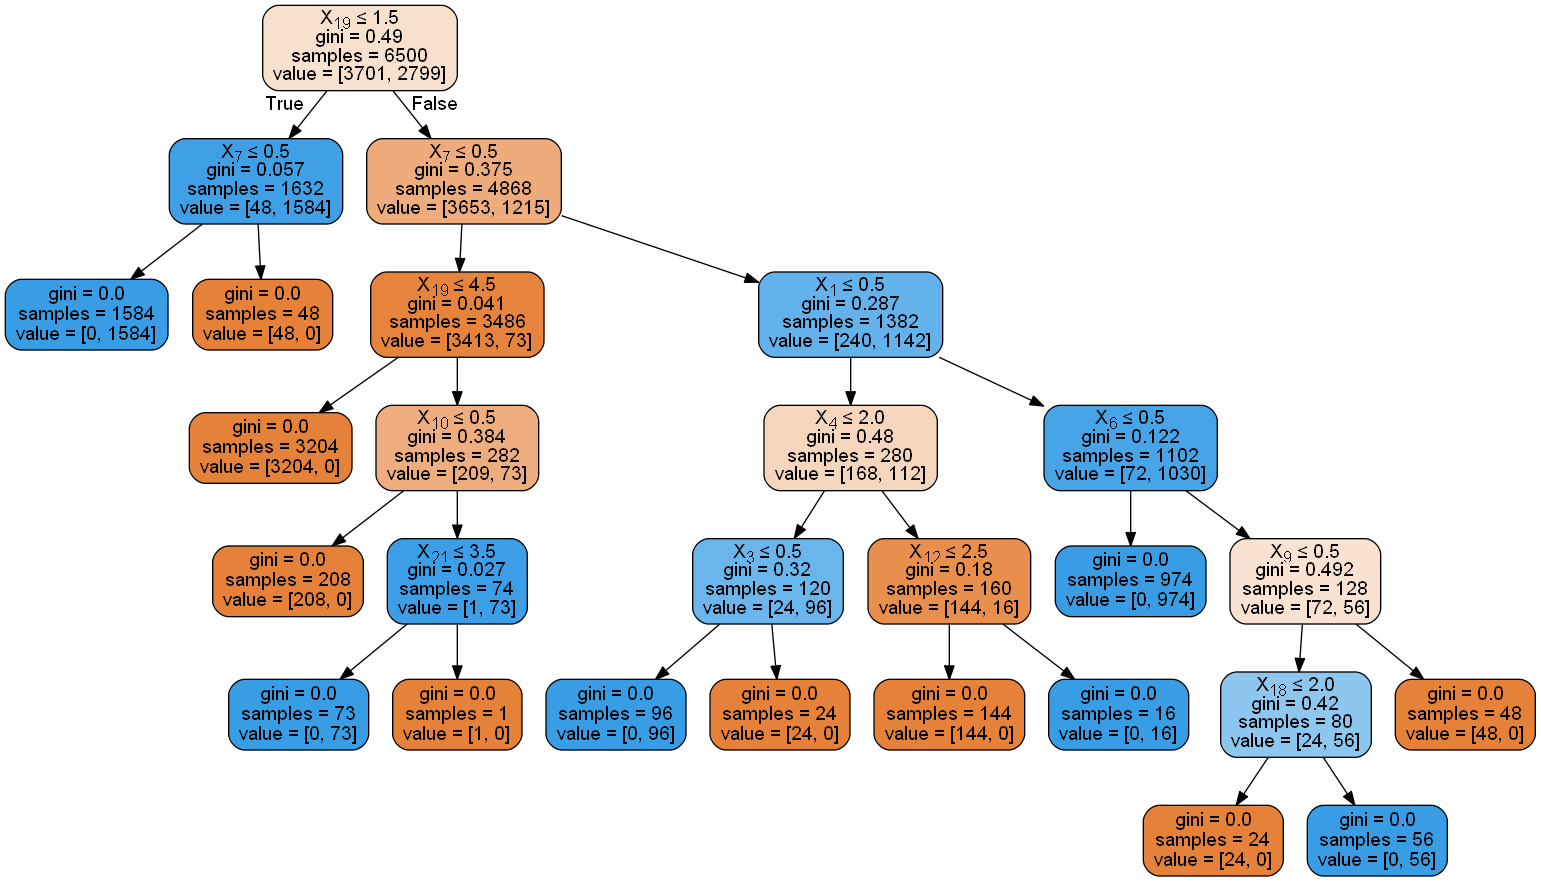

In [18]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(cv.best_estimator_, out_file=dot_data,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# 考察  
・OneHot化していないが非常に高い精度となった。  
　→分岐の連続により今回は一意のラベル分類と同様の結果にたまたまなっている？  
・ロジスティック回帰分析よりもランダムフォレストの方が精度高く出ている。  

## 次回に向けて  
・OneHot化しての精度比較。  
・棒グラフをしっかり観察しての変数の洗練化。  
・各要素のラベルと比較しながら分析  
・テストデータ抽出のやり方を変える